# Singular Value Decomposition (SVD)
(comapared to PCA...)
It's not always easy to directly compute the eigenvalues and eigenvectors. We can use a technique called SVD for more efficient computation. SVD is also useful for discovering hidden topics or ***latent features***.

Every matrix has a *unique* decomposition in the following form:

$M = U \Sigma V^T$

where
* $U$ is column orthogonal: $U^T U = I$
* $V$ is column orthogonal: $V^T V = I$
* $\Sigma$ is a diagonal matrix of positive values, where the diagonal is ordered in decreasing order

We can reduce the dimensions by sending the smaller of the diagonals to 0.

![http://www.shermanlab.com/science/CS/IR/DiracFockIR2/DiracFockRiemannAndIR_files/image002.gif](http://www.shermanlab.com/science/CS/IR/DiracFockIR2/DiracFockRiemannAndIR_files/image002.gif)


## SVD for topic analysis

We can use SVD to determine what we call ***latent features***. This will be best demonstrated with an example.

### Example

Let's look at users ratings of different movies. The ratings are from 1-5. A rating of 0 means the user hasn't watched the movie.

|       | Matrix | Alien | Serenity | Casablanca | Amelie |
| ----- | ------ | ----- | -------- | ---------- | ------ |
| **Alice** |      1 |     1 |        1 |          0 |      0 |
|   **Bob** |      3 |     3 |        3 |          0 |      0 |
| **Cindy** |      4 |     4 |        4 |          0 |      0 |
|   **Dan** |      5 |     5 |        5 |          0 |      0 |
| **Emily** |      0 |     2 |        0 |          4 |      4 |
| **Frank** |      0 |     0 |        0 |          5 |      5 |
|  **Greg** |      0 |     1 |        0 |          2 |      2 |

Note that the three movies (Matrix, Alien, Serenity) are Sci-fi movies and the last two (Casablanca, Amelie) are Romance. We will be able to mathematically pull out these topics!

Let's do the computation with Python.

In [6]:
from numpy.linalg import svd
import numpy as np


M = np.array([[1, 1, 1, 0, 0],
              [3, 3, 3, 0, 0],
              [4, 4, 4, 0, 0],
              [5, 5, 5, 0, 0],
              [0, 2, 0, 4, 4],
              [0, 0, 0, 5, 5],
              [0, 1, 0, 2, 2]])

u, e, v = svd(M)
print M
print "M ="
print 'u *\n',np.around(u, 2)
print 'E*\n', np.around(e, 2)
print 'V\n',np.around(v, 2)

[[1 1 1 0 0]
 [3 3 3 0 0]
 [4 4 4 0 0]
 [5 5 5 0 0]
 [0 2 0 4 4]
 [0 0 0 5 5]
 [0 1 0 2 2]]
M =
u *
[[-0.14 -0.02 -0.01  0.56 -0.38 -0.7  -0.19]
 [-0.41 -0.07 -0.03  0.21  0.76 -0.26  0.38]
 [-0.55 -0.09 -0.04 -0.72 -0.18 -0.34 -0.09]
 [-0.69 -0.12 -0.05  0.34 -0.23  0.57 -0.12]
 [-0.15  0.59  0.65  0.    0.2   0.   -0.4 ]
 [-0.07  0.73 -0.68  0.    0.    0.    0.  ]
 [-0.08  0.3   0.33  0.   -0.4   0.    0.8 ]]
E*
[ 12.48   9.51   1.35   0.     0.  ]
V
[[-0.56 -0.59 -0.56 -0.09 -0.09]
 [-0.13  0.03 -0.13  0.7   0.7 ]
 [-0.41  0.8  -0.41 -0.09 -0.09]
 [-0.71  0.    0.71  0.    0.  ]
 [ 0.   -0.    0.   -0.71  0.71]]


Note that the last two singular values are 0, so we can drop them. Note that these values are 0 because the rank of our original matrix is 3.

You can see the two topics fall out:

1. Science Fiction
    * First singular value (12.4)
    * First column of the $U$ matrix (note that the first four users have large values here)
    * First row of the $V$ matrix (note that the first three movies have large values here)
2. Romance
    * Second singular value (9.5)
    * Second column of the $U$ matrix (note that the last three users have large values here)
    * Second row of the $V$ matrix (note that the last two movies have large values here)

$U$ is the ***user-to-topic*** matrix and $V$ is the ***movie-to-topic*** matrix.

The third singular value is relatively small, so we can exclude it with little loss of data. Let's tdo that and reconstruct our matrix!

$\begin{align*}
\begin{bmatrix}
1 & 1 & 1 & 0 & 0 \\
3 & 3 & 3 & 0 & 0 \\
4 & 4 & 4 & 0 & 0 \\
5 & 5 & 5 & 0 & 0 \\
0 & 2 & 0 & 4 & 4 \\
0 & 0 & 0 & 5 & 5 \\
0 & 1 & 0 & 2 & 2
\end{bmatrix}
&\approx
\begin{bmatrix}
-0.14 & -0.02 \\
-0.41 & -0.07 \\
-0.55 & -0.09 \\
-0.69 & -0.12 \\
-0.15 & 0.59 \\
-0.07 & 0.73 \\
-0.08 & 0.3
\end{bmatrix}
\begin{bmatrix}
12.48 & 0.0 \\
0.0 & 9.51
\end{bmatrix}
\begin{bmatrix}
-0.56 & -0.59 & -0.56 & -0.09 & -0.09 \\
-0.13 & 0.03 & -0.13 & 0.7 & 0.7
\end{bmatrix} \\
&=
\begin{bmatrix}
0.99 & 1.01 & 0.99 & -0.0 & -0.0 \\
2.98 & 3.04 & 2.98 & -0.0 & -0.0 \\
3.98 & 4.05 & 3.98 & -0.01 & -0.01 \\
4.97 & 5.06 & 4.97 & -0.01 & -0.01 \\
0.36 & 1.29 & 0.36 & 4.08 & 4.08 \\
-0.37 & 0.73 & -0.37 & 4.92 & 4.92 \\
0.18 & 0.65 & 0.18 & 2.04 & 2.04
\end{bmatrix}
\end{align*}$

###Example with Data: What Books do People Like?

####1. Simple Data Aquisition/Cleaning
first aquire and clean the dataset.

In [96]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
%matplotlib inline

#this tells all the ratings 
ratings = pd.read_csv('data/book_reviews.csv')
print ratings.head()


   Unnamed: 0  User-ID        ISBN  Book-Rating
0        1083   277195  0060391626           10
1        1084   277195  0060502258            0
2        1089   277195  0060987561            0
3        1098   277195  0316666343            0
4        1099   277195  0316734837            0


####2) Get the User x Movie Matrix with Values of the Ratings
Pivot the ISBN So we can get a matrix of User x Book, with Rating as the Values

In [28]:
data = ratings.pivot('User-ID','ISBN','Book-Rating')
data.fillna(-1,inplace=True)
data.head()

ISBN,0006493580,000649840X,0006512135,0006513204,0006514855,0006547834,0006550576,0006550681,0006550789,0007110928,...,8495618605,8497593588,8804342838,8806142100,8806143042,8807813025,8817106100,8845205118,8873122933,8885989403
User-ID,,,,,,,,,,,,,,,,,,,,,
243,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
254,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
507,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
638,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
805,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


#####3) Get the U, S, V matrix
Using numpy's SVD method, decompose our rating matrix into 3 component matrices.

Now that we have our component matrices, we would like to inspect the decomposition and determine how many dimensions we should keep. This is the same process as what we did above for the image dataset with the scree-plot.



In [50]:
U,Sigma,VT = np.linalg.svd(data)

####4) Use the Elbow method to determine the number of latent features to 'keep'/consider 
First calculate the energy that each singular value represents. Energy is the same as variance of a dimension and we can compute it simply by squaring the singular values.
Total energy is the sum of the energy of each singular value. Plot the energy of each singular value and look for the 'elbow'. How many singular values should you keep?

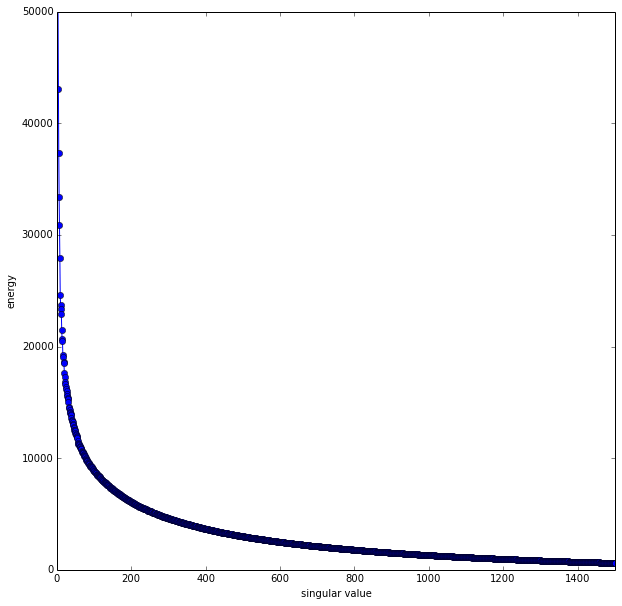

In [46]:
def plot_svd_energy(Sigma):
    '''takes the s matrix from np.linalg.svd(data), plots the energy (variance of a dimension)'''
    energy = Sigma**2
    
    plt.figure(figsize=(10,10))
    plt.xlabel('singular value')
    plt.ylabel('energy')
    
    plt.plot(energy,marker='o')
    #plt.yscale('log')
    plt.ylim(0, 50000)
    plt.xlim(0, 1500)
    plt.show()
    
plot_svd_energy(Sigma)
#Decide to keep around 

The reason we might be interested in total energy is to have some sense of the information loss of our transformation. Plot how the total energy varies as you add additional singular values, i.e. plot total energy of SV1, SV1 + SV2, SV1 + SV2 + SV3, etc. This is equivalent to the cumulative sum of the squares of the singular values. How many singular values do you need to keep to retain 90% of the total energy?

440


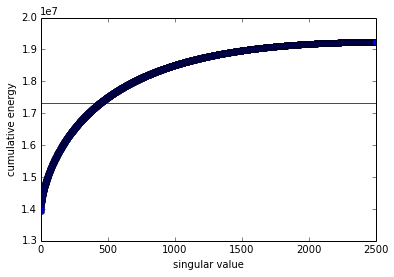

In [48]:
def plot_total_energy(Sigma,n):
    energy = Sigma**2
    
    total_energy = np.cumsum(energy[:n])
    plt.plot(total_energy,marker='o')
    plt.xlabel('singular value')
    plt.ylabel('cumulative energy')
    final = 0.9*total_energy[-1]
    plt.hlines(final,0,n,color='r')
    print np.argmin(abs(total_energy-final))
    plt.xlim(0, 2500)


plot_total_energy(Sigma,2500)


####3) Keep a subset of topics. Let's just do 10 (I know! Crazy few)'
 Look at V to find which books most contribute to each 'topic'. For each of these 'topics', print out the title and author of the 10 most relevant books.

Get the info form the meta data file earlier.

Reminder: U - Sigma - V^T

In [89]:
#get the metadata so we can pull author informaiton about th ebook
books = pd.read_csv('data/book_meta.csv', sep=';', error_bad_lines=False)
books = books.set_index('ISBN')

Skipping line 227933: expected 10 fields, saw 11

/Users/clwilloughby/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1164: DtypeWarning: Columns (3,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [68]:
U_10 = U[:,:10]
#want all the users, only the first 10 features
V_10 = VT[:10,:]
#want the first 10 features, all the books


In [98]:
def print_titles(topic, n):
    '''Prints out the top n Books and Authors for a given topic (latent feature)'''
    
    #first sort the every row (the features) so that the isbns are in order
    indx = np.argsort(topic)
    rv_indx = indx[::-1] #have to reverse it so highest isbns first
    
    #get the first n (here is 10) isbn
    for idx in data.columns[rv_indx[:n]]:
        try:
            #use the sorted isbns to pull the corresponding title
            print books.loc[idx]['Book-Title'] + " : " + books.loc[idx]['Book-Author']
        except Exception:  #if there is no book title then..ohwell
            continue

In [97]:
#loop over the top 10 topics
#for each topic, use the function to print out the top 10 books and authors
for i in range(len(V_10)):
    print "Topic #%d :" % (i+1)
    print "\n"
    print_titles(V_10[i], 10)
    print "\n"

Topic #1 :


Name Der Rose : Umberto Eco
Monsieur Ibrahim und die Blumen des Koran. Erz�?¤hlung. : Eric-Emmanuel Schmitt
Artemis Fowl. : Eoin Colfer
Novocento, Un Monologo : Alessandro Baricco
Schlafes Bruder : Robert Schneider
New Vegetarian: Bold and Beautiful Recipes for Every Occasion : Celia Brooks Brown
Der Alchimist. : Paulo Coelho
Die Weiss Lowin / Contemporary German Lit : Henning Mankell
Crazy : Benjamin Lebert
Free : Paul Vincent


Topic #2 :


The Red Tent (Bestselling Backlist) : Anita Diamant
The Lovely Bones: A Novel : Alice Sebold
The Da Vinci Code : Dan Brown
Where the Heart Is (Oprah's Book Club (Paperback)) : Billie Letts
Two for the Dough : Janet Evanovich
Snow Falling on Cedars : David Guterson
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)) : J. K. Rowling
1st to Die: A Novel : James Patterson
Good in Bed : Jennifer Weiner
Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson : MITCH ALBOM


Topic #3 :


Dance upon the Air (Thr